<a href="https://colab.research.google.com/github/kishmys/Assignment-2/blob/master/Assignment_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
# Install and import Keras to the notebook
!pip install -q keras
import keras

In [0]:
# Importing all the necessary libraries and modules

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
# importing mnist dataset which is available in keras
from keras.datasets import mnist

In [0]:
# load the mnist data to train and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


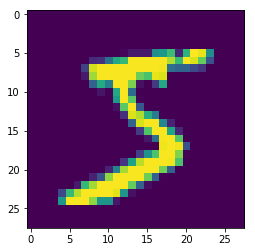

In [39]:
# Print the shape of the train set. Import matplotlib and plot the first image (index 0) in train set
print (X_train.shape) 
from matplotlib import pyplot as plt 
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# The input image is reshaped using numpy to form 4D tensor input

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#print(X_train.shape)
#print(X_train)

In [0]:
# Train and test data (arrays) is changed to float32 datatype

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The values are normalized
X_train /= 255
X_test /= 255

In [25]:
# Display first 10 values of y_train
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# This is done using one hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [27]:
# Dislay first 10 encoded labels
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
from keras.layers import Activation, MaxPooling2D

# Model is built by stacking layers using keras sequential model
# Convolution is done in first 3 layers extracting the desired feature followed by a maxpooling layer
# Maxpooling is used to reduce the input resolution by half, it extractls loudes features.
# It is followed by 5 convolution layer. The output from the 9th layer is flattened and fed to softmax layer.

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))   # input - (28x28x1), Rf - (3x3)
model.add(Convolution2D(64, 3, 3, activation='relu'))                          # input - (26x26x32), Rf - (5x5)
model.add(Convolution2D(128, 3, 3, activation='relu'))                         # input - (24x24x64), Rf - (7x7)

model.add(MaxPooling2D(pool_size=(2, 2)))                                      # input - (22x22x128), Rf - (14x14)

model.add(Convolution2D(256, 3, 3, activation='relu'))                         # input - (11x11x128), Rf - (16x16)
model.add(Convolution2D(512, 3, 3, activation='relu'))                         # input - (9x9x256), Rf - (18x18)
model.add(Convolution2D(1024, 3, 3, activation='relu'))                        # input - (7x7x512), Rf - (20x20)
model.add(Convolution2D(2048, 3, 3, activation='relu'))                        # input - (5x5x1024), Rf - (22x22)
model.add(Convolution2D(10, 3, 3, activation='relu'))                          # input - (3x3x2048), Rf - (24x24)

model.add(Flatten())                                                           # input - (1x1x10)
model.add(Activation('softmax'))                                               # input - (10)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(51

In [0]:
# Model is configured for training by choosing loss function and optimizer (which are used to train and update the model). Metrics is specified for evaluation. 
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
# Model is trained for the required number of epochs.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.1511 - acc: 0.1727
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==================

In [31]:
# Model is evaluated on test data, which returns loss and metric (accuracy) values
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.3025851249694824, 0.098]


In [32]:
# Predicted values (labels) are generated and printed along with the actual lables for comparison.
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


###Drawbacks of the Network

  

*  The model is severly underfitting the data and has high Bias.
*  The kernels are increased in power of 2 without reducing the number of channels, this creates a very wide network. 
*  3x3 convolution is used to decrease the number of channels which is not efficient.
*  The receptive field of the model is not equal to the image size. 


